<a href="https://colab.research.google.com/github/Rutuja2610647/Capstone_Project/blob/main/Capstone_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load and Explore the Dataset**


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [82]:
# Load the dataset
df = pd.read_csv("Dentistry Dataset.csv")

In [83]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [84]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


**What are the missing values in the dataset?**

In [85]:
# Check for missing values
df.isnull().sum()

,0
Sl No,0
Sample ID,1100
Age,0
Gender,0
inter canine distance intraoral,0
intercanine distance casts,0
right canine width intraoral,0
right canine width casts,0
left canine width intraoral,0
left canine width casts,0


In [86]:
print(df.columns)



Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')


**Step 2: Data Preprocessingv**

**How do you handle missing values?**

In [87]:
import pandas as pd

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [88]:
# Fill missing values for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [89]:
print(df.dtypes)


Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object


In [90]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).unique()}")


Sl No: [<class 'int'>]
Sample ID: [<class 'float'>]
Age: [<class 'int'>]
Gender: [<class 'str'>]
inter canine distance intraoral: [<class 'float'>]
intercanine distance casts: [<class 'float'>]
right canine width intraoral: [<class 'float'>]
right canine width casts: [<class 'float'>]
left canine width intraoral: [<class 'float'>]
left canine width casts: [<class 'float'>]
right canine index intra oral: [<class 'float'>]
right canine index casts: [<class 'float'>]
left canine index intraoral: [<class 'float'>]
left canine index casts: [<class 'float'>]


In [91]:
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.dropna().mode()[0] if not x.dropna().mode().empty else "Unknown"))


In [92]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [93]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
print(df.columns)


Index(['sl no', 'sample id', 'age', 'gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')


In [94]:
df.get('your_numeric_column', 'Column Not Found')


'Column Not Found'

In [95]:
df.get('your_numeric_column')

In [96]:
df.select_dtypes(include=[np.number])

,sl no,sample id,age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [97]:
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [98]:
import pandas as pd
import numpy as np

print(df.columns)

df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



Index(['sl no', 'sample id', 'age', 'gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')


In [99]:
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


sl no                                 0
sample id                          1100
age                                   0
gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


How do you encode categorical data like Gender?

In [100]:
print([col for col in df.columns if "gender" in col.lower()])


['gender']


In [101]:
encoder = LabelEncoder()
df["gender"] = encoder.fit_transform(df["gender"])  # Male = 1, Female = 0


How do you normalize the independent variables?

In [102]:
normalizer = Normalizer()
X = df.drop(columns=["gender", "sample id", "sl no"])
# Drop non-predictive columns
X = normalizer.fit_transform(X)


**Step 3: Exploratory Data Analysis (EDA)**

How do you visualize feature correlations?

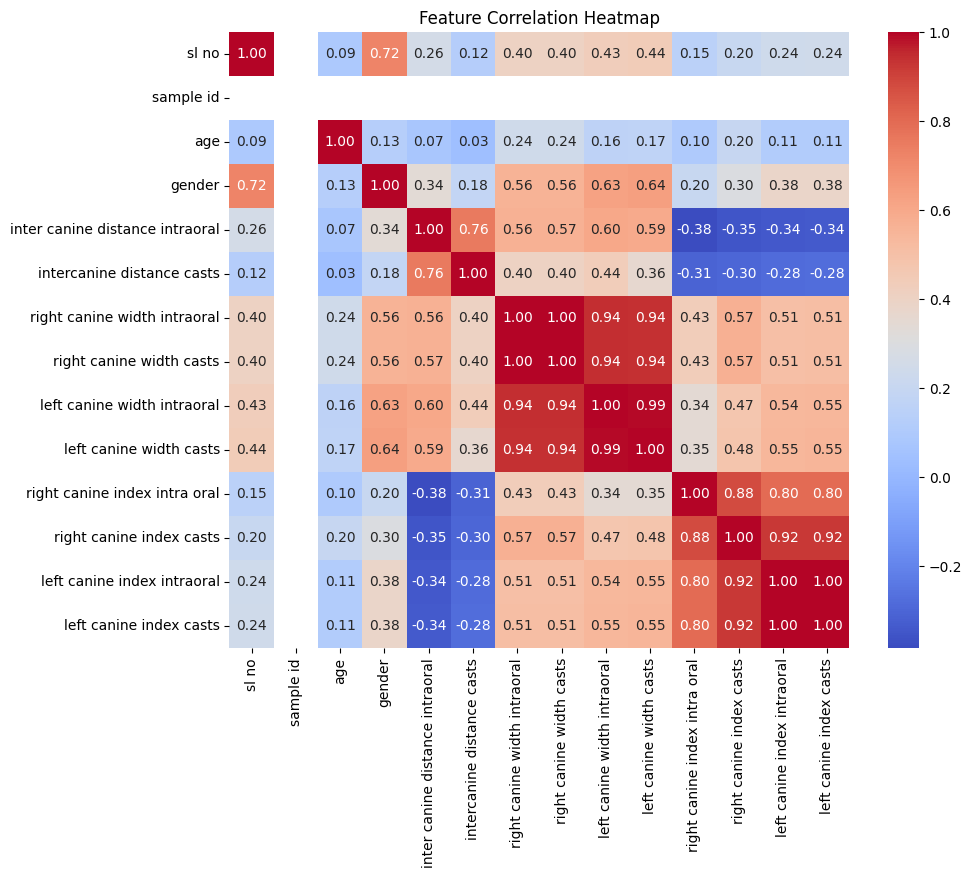

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Step 4: Model Building**

 How do you split the dataset into train and test sets?

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, df["gender"], test_size=0.2, random_state=42)


 How do you train different models (Logistic Regression, Decision Tree, Random Forest, XGBoost)?

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
XGBoost trained successfully.


**Step 5: Model Evaluation**

How do you evaluate model performance?

In [106]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.6636
Decision Tree Accuracy: 0.8636
Random Forest Accuracy: 0.8909
XGBoost Accuracy: 0.8909


How do you plot the ROC and AUC curves?

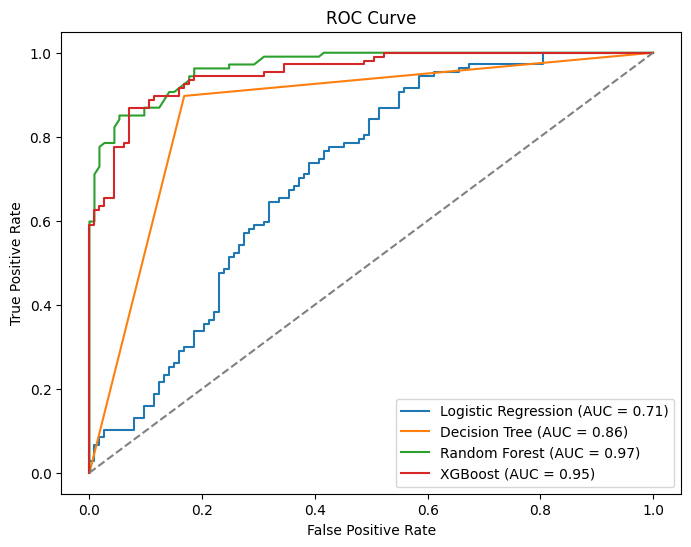

In [107]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Feature Encoding**

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Converts categories into 0 & 1


**Feature Scaling**

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Hyperparameter Tuning**

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)  # Prints the best hyperparameters


{'max_depth': 20, 'n_estimators': 200}


**Model Evaluation**

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))  # Displays Confusion Matrix
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score


[[101  12]
 [ 12  95]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       113
           1       0.89      0.89      0.89       107

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



**Step 6: Documentation**

How do you document the project for submission?



*   Write a report covering:

1.   Objective
2.   Data Understanding
3.   Preprocessing Steps
4.   Model Building and Performance Metrics
5.   Conclusion (Best Model)








**✅ Final Summary: Ensure Your Project Includes**



1.    Data Cleaning (Handling missing values, duplicates)
2.    Feature Engineering & Encoding (One-Hot Encoding, Label Encoding if needed
3.    Scaling/Normalization (StandardScaler, MinMaxScaler, or Normalizer)
4.    Model Training & Evaluation (Logistic Regression, Random Forest, XGBoost, etc.)
5.    Feature Importance Analysis (Using RandomForestClassifier
6.    Hyperparameter Tuning (Optimizing models using GridSearchCV)  